In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets
import numpy as np

* RGB Channel : 3

In [14]:
(images_train,labels_train), (images_test,labels_test) = datasets.cifar10.load_data()
print('----------------train----------------')
print('images:',images_train.shape, images_train.min(), images_train.max())
print('labels:',labels_train.shape)
print('----------------test----------------')
print('images:',images_test.shape, images_test.min(), images_test.max())
print('labels:',labels_test.shape)

----------------train----------------
images: (50000, 32, 32, 3) 0 255
labels: (50000, 1)
----------------test----------------
images: (10000, 32, 32, 3) 0 255
labels: (10000, 1)


시각화를 위해 필요한 모듈

In [3]:
images_train=images_train/255.

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

시각화 함수

In [5]:
def visualize(augmentation_func):
    fig, subplots = plt.subplots(2, 4, figsize=(14, 7)) # 2행 4열에 size 14x7
    for i in range(4):
        axi1 = subplots.flat[i]
        axi2 = subplots.flat[i+4]

        original_img = tf.expand_dims(images_train[i],0)
        augmented_img = augmentation_func(original_img)[0]

        axi1.imshow(original_img[0])
        axi2.imshow(augmented_img)
        axi1.set_title('original_img')
        axi2.set_title('augmented_img')

### Random Flip left right
random으로 좌우 이미지 반전

* `layers.experimental.preprocessing.` 를 사용

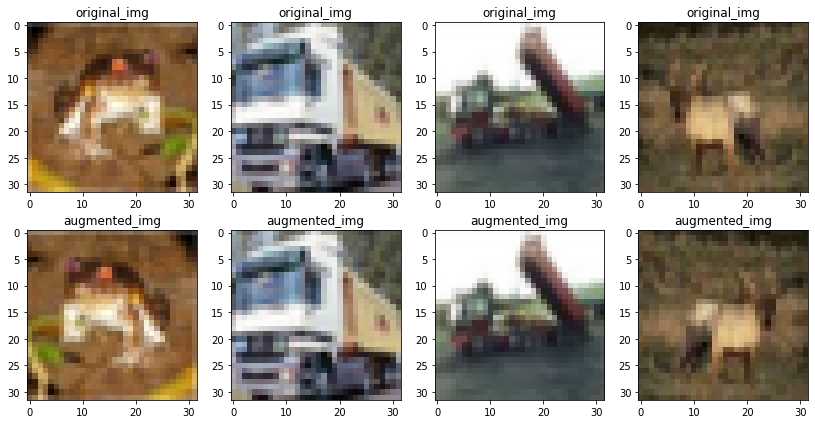

In [6]:
aug = layers.experimental.preprocessing.RandomFlip("horizontal")
visualize(aug)

### Random Flip up down
random으로 위 아래 반전

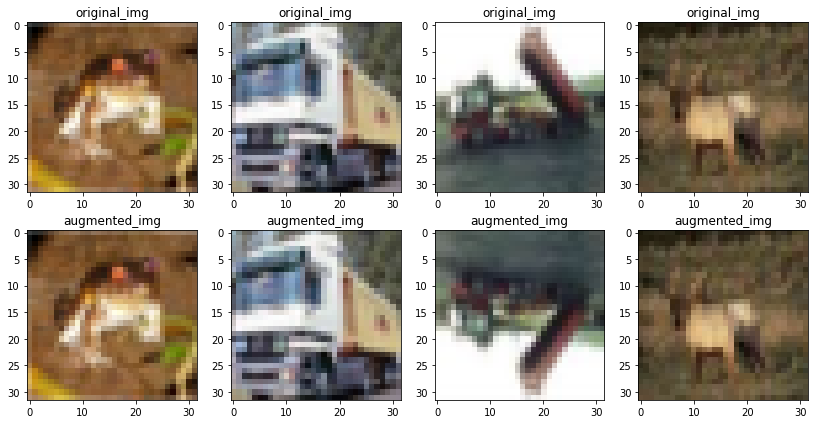

In [7]:
aug = layers.experimental.preprocessing.RandomFlip("vertical")
visualize(aug)

### Random Flip Horizontal and Vertical
random 위 아래, 왼 오른 랜덤으로 반전

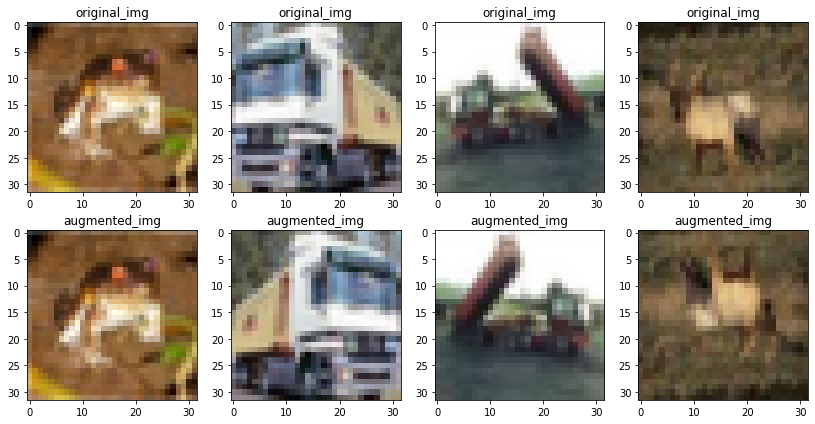

In [8]:
aug = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
visualize(aug)

### Random Rotation
image를 회전

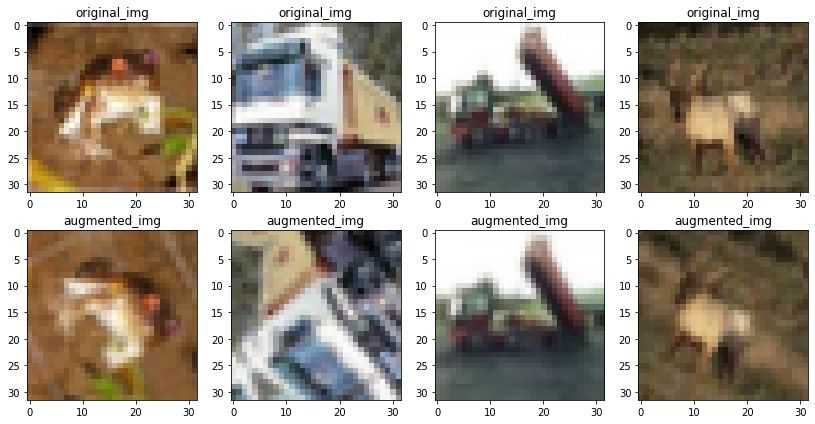

In [9]:
aug = layers.experimental.preprocessing.RandomRotation(0.5)
visualize(aug)

### Random Crop
random한 위치에서 이미지가 잘림

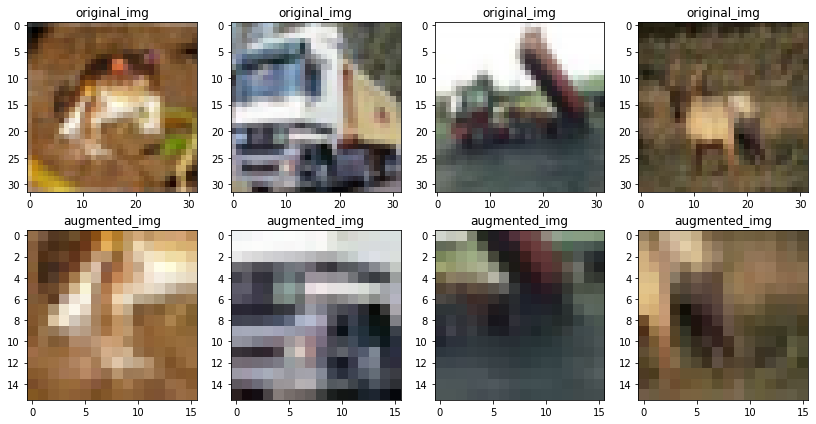

In [10]:
aug = layers.experimental.preprocessing.RandomCrop(16, 16) # 16 by 16 image로 잘림
visualize(aug)

### Center Crop
정해진 크기로 이미지의 중앙 부분을 잘라냄

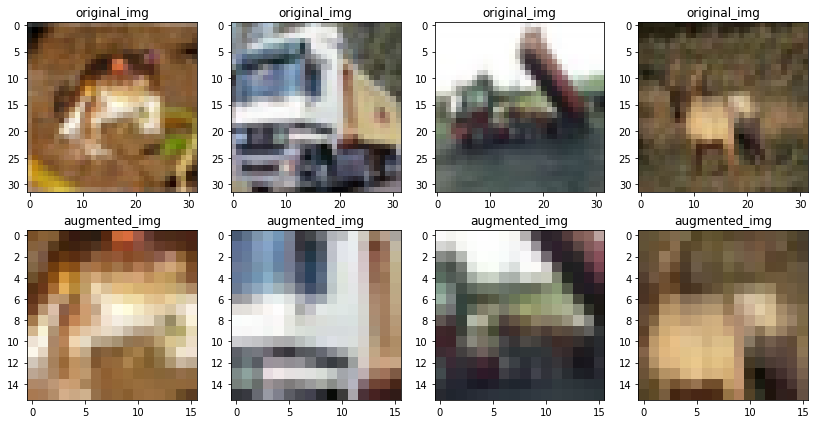

In [11]:
aug = layers.experimental.preprocessing.CenterCrop(16, 16) # 16 by 16 image로 잘림
visualize(aug)

### Random contrast
이미지 대조를 랜덤 변화

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


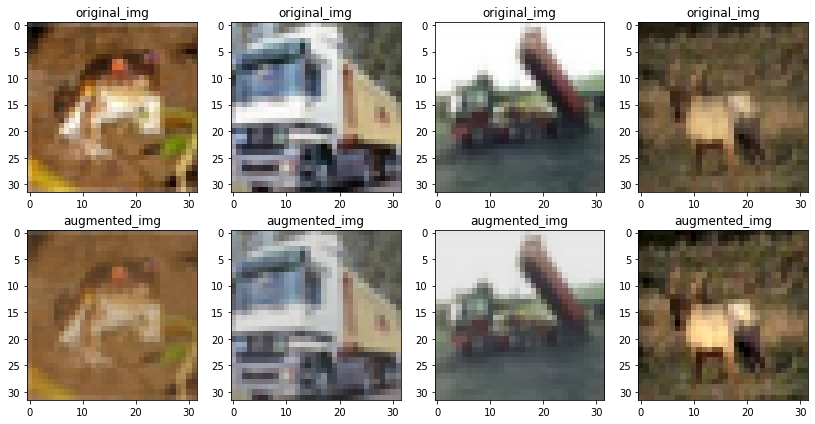

In [12]:
aug = layers.experimental.preprocessing.RandomContrast(0.5) 
# 각 channel마다 대조가 [1-0.5, 1+0.5]의 factor로 랜덤하게 선택됨
visualize(aug)

### Resize

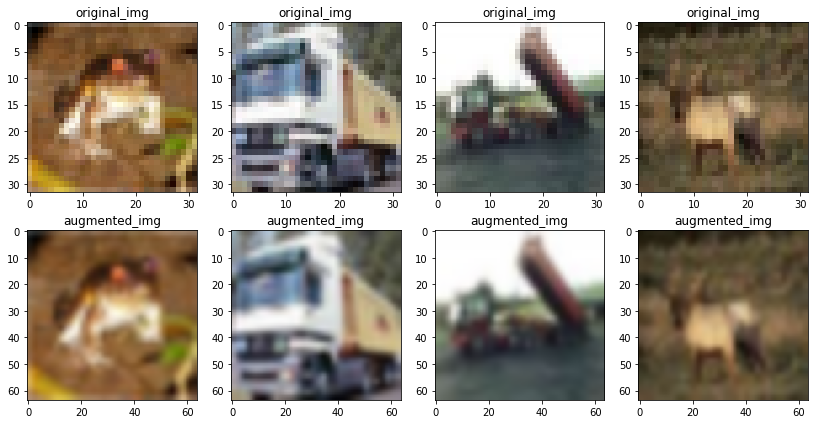

In [13]:
aug = layers.experimental.preprocessing.Resizing(64, 64) # 64 by 64 image로 resize
visualize(aug)